In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 %cd 'drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


### Membaca data graph dari file csv

In [3]:
import pandas as pd
df = pd.read_csv('data_GA.csv')

df.head()

,Kode Bandara Asal,Kota Asal,Bandara Asal,Kode Bandara Tujuan,Kota Tujuan,Bandara Tujuan,Count,date
0,BDJ,Banjarmasin (BDJ),Sjamsudin Noor Airport (BDJ),CGK,Jakarta (JKT),Soekarno Hatta International Airport (CGK),1,4/20/2021
1,BIK,Biak (BIK),Frans Kaisiepo Airport (BIK),DJJ,Jayapura (DJJ),Sentani Airport (DJJ),1,4/20/2021
2,BKS,Bengkulu (BKS),Fatmawati Soekarno Airport (BKS),CGK,Jakarta (JKT),Soekarno Hatta International Airport (CGK),1,4/20/2021
3,BPN,Balikpapan (BPN),Sepinggan Airport (BPN),TRK,Tarakan (TRK),Juwata International Airport (TRK),1,4/20/2021
4,BTH,Batam (BTH),Hang Nadim Airport (BTH),CGK,Jakarta (JKT),Soekarno Hatta International Airport (CGK),1,4/20/2021


### Mengekstraksi kode bandara untuk membuat gambar *graph*

In [4]:
df = df[['Kode Bandara Asal', 'Kode Bandara Tujuan']].values

for route in df:
  route[:2] = sorted(route[:2])

df = pd.DataFrame(df, columns = ['Kode Bandara 1', 'Kode Bandara 2'])
df = df.drop_duplicates()

df.head()

,Kode Bandara 1,Kode Bandara 2
0,BDJ,CGK
1,BIK,DJJ
2,BKS,CGK
3,BPN,TRK
4,BTH,CGK


### Membuat gambar *graph*

In [5]:
import networkx as nx

G = nx.Graph()

In [6]:
# add nodes to graph

G.add_nodes_from(df['Kode Bandara 1'])
G.add_nodes_from(df['Kode Bandara 2'])

In [7]:
# add edges to graph

for index, row in df.iterrows():
    G.add_edge(row['Kode Bandara 1'], row['Kode Bandara 2'])

In [8]:
# add attribute timezone to nodes

timezone = {
  'KDI': 'WITA',  'TTE': 'WIT',   'KNO': 'WIB',   'BDJ': 'WITA',  'BIK': 'WIT',
  'TNJ': 'WIB',   'BPN': 'WITA',  'MJU': 'WITA',  'BTJ': 'WIB',   'PNK': 'WIB',
  'DJB': 'WIB',   'PKU': 'WIB',   'SOQ': 'WIT',   'KOE': 'WITA',  'TRK': 'WITA',
  'PLW': 'WITA',  'BTH': 'WIB',   'PKY': 'WIB',   'DJJ': 'WIT',   'LOP': 'WITA',
  'PGK': 'WIB',   'UPG': 'WIB',   'SUB': 'WIB',   'SRG': 'WIB',   'DPS': 'WITA',
  'GNS': 'WIB',   'FLZ': 'WIB',   'BKS': 'WIB',   'TIM': 'WIT',   'NBX': 'WIT',
  'PLM': 'WIB',   'MKW': 'WIT',   'PDG': 'WIB',   'TKG': 'WIB',   'MDC': 'WITA',
  'CGK': 'WIB',   'GTO': 'WITA',  'YIA': 'WIB'
}

nx.set_node_attributes(G, timezone, 'timezone')

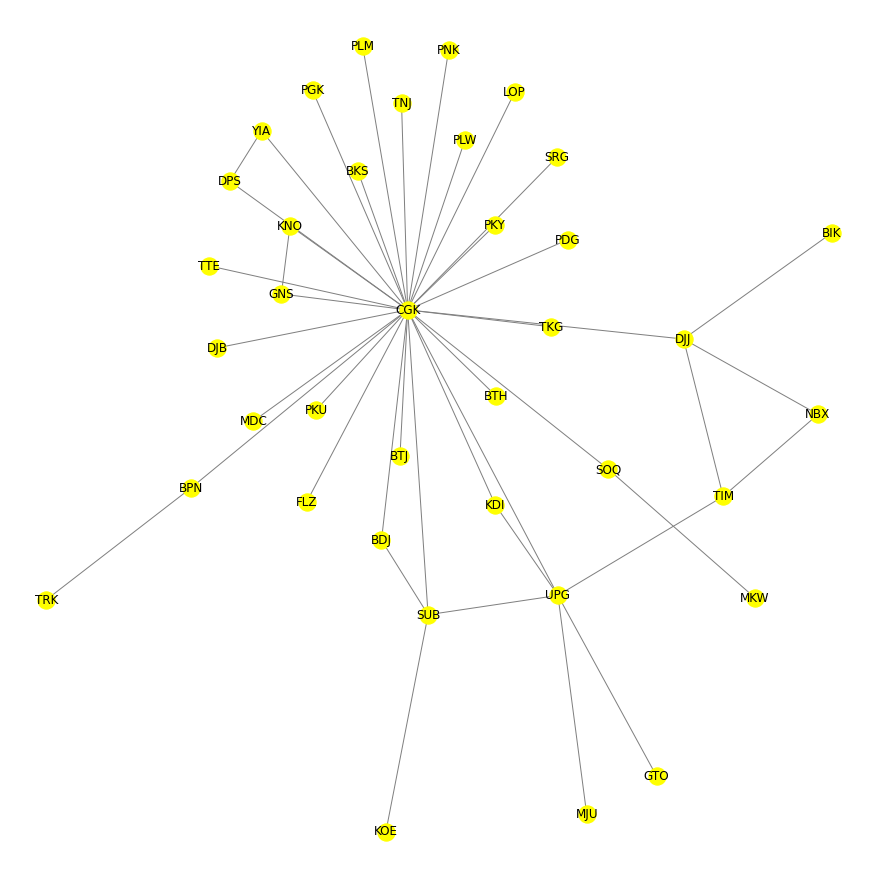

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

nx.draw(G, with_labels = True, node_color = 'yellow', edge_color = 'grey')

### 1. *Descriptive Analytics*:

### Bandara apa yang paling sibuk pada penerbangan GA?

Yang paling sibuk adalah bandara **Soekarno Hatta International Airport (CGK)**

Dihitung menggunakan *betweenness centrality* sebagai berikut:

In [10]:
import operator

# find betweenness centralities
betweenness_centrality = nx.betweenness_centrality(G)

# get the items and make a list
betweenness_centrality = list(betweenness_centrality.items())

# sort by centrality values, descending
betweenness_centrality.sort(key=lambda data : data[1], reverse=True)

# show 10 biggest betweenness centrality (the rest has value of 0)
betweenness_centrality[:10]

[('CGK', 0.9379379379379379),
 ('UPG', 0.13613613613613612),
 ('DJJ', 0.11911911911911913),
 ('SUB', 0.056806806806806796),
 ('BPN', 0.05405405405405406),
 ('SOQ', 0.05405405405405406),
 ('TIM', 0.01126126126126126),
 ('BDJ', 0.0),
 ('BIK', 0.0),
 ('BKS', 0.0)]

### 2. *Inferential Analytics*:

### Apakah jalur penerbangan GA cenderung hanya beroperasi di wilayah yang sama? Konteks wilayah disini adalah 3 wilayah waktu Indonesia, yaitu WIB, WITA, dan WIT.

Nilai *assortativity* berdasarkan atribut wilayah waktu (*timezone*) adalah **0.22123893805309733**

In [11]:
nx.attribute_assortativity_coefficient(G, 'timezone')

0.2212389380530973

Menghitung *homophily*

Nilai *expected* 0.6052631578947368 sedangkan nilai *actual* 0.38636363636363635

Artinya dapat dikatakan terjadi ***homophily***

In [12]:
from collections import Counter
Counter(timezone.values())

Counter({'WIB': 20, 'WIT': 7, 'WITA': 11})

In [13]:
wib  = 20/38
wit  = 7/38
wita = 11/38

# the expected fraction of cross-timezone edges
2*wib*wit + 2*wib*wita + 2*wit*wita

0.6052631578947368

In [14]:
nx.attribute_mixing_dict(G, 'timezone')

{'WIB': {'WIB': 42, 'WIT': 4, 'WITA': 13},
 'WIT': {'WIB': 4, 'WIT': 10},
 'WITA': {'WIB': 13, 'WITA': 2}}

In [15]:
# the actual cross-timezone edges. 4 is WIB-WIT and 13 is WIB-WITA
(4 + 13) / len(df)

0.38636363636363635

In [16]:
len(df)

44

### 3. *Predictive Analytics*:

### Jalur penerbangan baru apa yang paling mungkin terjadi di bandara Ngurah Rai International Airport (DPS)?

Yang terprediksi paling mungkin untuk menjadi jalur baru dengan **DPS** adalah **UPG** dengan skor 12 berdasarkan *preferential attachment*

In [17]:
# find link predictions
link_prediction = list(nx.preferential_attachment(G))

# sort by preferential attachment value, descending
link_prediction.sort(key=lambda data : data[2], reverse=True)

cnt = 0

# show 5 best link predictions containing airport DPS
for route in link_prediction:
  if route[0] == 'DPS' or route[1] == 'DPS':
    print(route)

    cnt += 1
    if cnt == 5:
      break

('DPS', 'UPG', 12)
('DPS', 'SUB', 8)
('DPS', 'DJJ', 8)
('DPS', 'TIM', 6)
('DPS', 'SOQ', 4)
